# Lesson 54: Image Classification with Convolutional Neural Networks (CNNs)

## Introduction

Welcome to Lesson 54! Today, we dive deep into **Convolutional Neural Networks (CNNs)**, one of the most revolutionary architectures in deep learning. CNNs have transformed computer vision, enabling breakthroughs in image classification, object detection, facial recognition, and medical imaging.

Unlike traditional neural networks that treat images as flat vectors, CNNs preserve spatial relationships in image data through specialized layers that learn hierarchical features. From detecting simple edges and textures in early layers to recognizing complex objects in deeper layers, CNNs mimic the hierarchical processing of the human visual cortex.

### What You'll Learn

In this lesson, you will:
- Understand the architecture and key components of CNNs
- Learn how convolutional and pooling layers work mathematically
- Implement a CNN for image classification using TensorFlow/Keras
- Visualize learned features and understand what CNNs "see"
- Apply CNNs to real-world image classification tasks

### Prerequisites

- Basic understanding of neural networks and backpropagation
- Familiarity with Python, NumPy, and Matplotlib
- Knowledge of gradient descent and optimization

## Theory

### The CNN Architecture

A Convolutional Neural Network consists of several types of layers:

1. **Convolutional Layers**: Extract features using learnable filters
2. **Pooling Layers**: Reduce spatial dimensions while retaining important information
3. **Fully Connected Layers**: Perform final classification based on extracted features
4. **Activation Functions**: Introduce non-linearity (typically ReLU)

### Convolutional Layer Mathematics

The convolution operation applies a filter (kernel) $K$ of size $f \times f$ to an input image $I$ to produce a feature map $F$. For a 2D convolution:

$$
F(i, j) = \sum_{m=0}^{f-1} \sum_{n=0}^{f-1} I(i+m, j+n) \cdot K(m, n) + b
$$

where:
- $F(i, j)$ is the output feature map value at position $(i, j)$
- $I(i+m, j+n)$ is the input image region
- $K(m, n)$ is the filter/kernel weight
- $b$ is the bias term

### Output Dimensions

Given an input of size $n \times n$, filter size $f \times f$, padding $p$, and stride $s$, the output dimension is:

$$
n_{out} = \left\lfloor \frac{n + 2p - f}{s} \right\rfloor + 1
$$

### Pooling Operations

**Max Pooling** selects the maximum value in each pooling window:

$$
P(i, j) = \max_{m, n \in \text{window}} F(i \cdot s + m, j \cdot s + n)
$$

**Average Pooling** computes the mean:

$$
P(i, j) = \frac{1}{f^2} \sum_{m=0}^{f-1} \sum_{n=0}^{f-1} F(i \cdot s + m, j \cdot s + n)
$$

### Why CNNs Work for Images

1. **Parameter Sharing**: The same filter is applied across the entire image, drastically reducing parameters
2. **Spatial Hierarchy**: Early layers detect edges, middle layers detect patterns, deep layers detect objects
3. **Translation Invariance**: Features are detected regardless of position in the image
4. **Local Connectivity**: Each neuron connects only to a local region, capturing spatial relationships

## Python Implementation

Let's implement a CNN for image classification. We'll start with the necessary imports.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

2025-11-09 22:27:48.158073: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-09 22:27:48.158751: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-09 22:27:48.255501: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-11-09 22:27:52.144221: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-09 22:27:52.159541: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


TensorFlow version: 2.20.0
Keras version: 3.12.0


### Load and Prepare the Dataset

We'll use the Fashion-MNIST dataset, which contains 70,000 grayscale images of clothing items in 10 categories.

In [2]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training set shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"\nNumber of classes: {len(class_names)}")
print(f"Pixel value range: [{x_train.min()}, {x_train.max()}]")

Training set shape: (60000, 28, 28)
Training labels shape: (60000,)
Test set shape: (10000, 28, 28)
Test labels shape: (10000,)

Number of classes: 10
Pixel value range: [0, 255]


### Data Preprocessing

In [3]:
# Normalize pixel values to [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Reshape for CNN (add channel dimension)
x_train_cnn = x_train_normalized.reshape(-1, 28, 28, 1)
x_test_cnn = x_test_normalized.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print(f"Preprocessed training shape: {x_train_cnn.shape}")
print(f"Preprocessed test shape: {x_test_cnn.shape}")
print(f"One-hot encoded labels shape: {y_train_categorical.shape}")
print(f"\nExample label before one-hot: {y_train[0]} ({class_names[y_train[0]]})")
print(f"Example label after one-hot: {y_train_categorical[0]}")

Preprocessed training shape: (60000, 28, 28, 1)
Preprocessed test shape: (10000, 28, 28, 1)
One-hot encoded labels shape: (60000, 10)

Example label before one-hot: 9 (Ankle boot)
Example label after one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Build the CNN Model

We'll create a CNN with the following architecture:
- Conv2D (32 filters, 3x3) → ReLU → MaxPooling
- Conv2D (64 filters, 3x3) → ReLU → MaxPooling
- Conv2D (64 filters, 3x3) → ReLU
- Flatten → Dense (64) → ReLU → Dropout
- Dense (10, softmax)

In [4]:
# Build CNN model
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv1'),
    layers.MaxPooling2D((2, 2), name='pool1'),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
    layers.MaxPooling2D((2, 2), name='pool2'),
    
    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu', name='conv3'),
    
    # Fully connected layers
    layers.Flatten(name='flatten'),
    layers.Dense(64, activation='relu', name='dense1'),
    layers.Dropout(0.5, name='dropout'),
    layers.Dense(10, activation='softmax', name='output')
])

# Display model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-09 22:27:53.983214: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compile and Train the Model

In [5]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train_cnn, y_train_categorical,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

print("\nTraining completed!")

Epoch 1/10


  1/375 ━━━━━━━━━━━━━━━━━━━━ 16:26 3s/step - accuracy: 0.0703 - loss: 2.3213

  5/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1062 - loss: 2.3033 

  9/375 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1356 - loss: 2.2899

 14/375 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1620 - loss: 2.2694

 19/375 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1848 - loss: 2.2400

 24/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2063 - loss: 2.2016

 29/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2262 - loss: 2.1600

 34/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2444 - loss: 2.1185

 39/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2608 - loss: 2.0786

 44/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2760 - loss: 2.0406

 49/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2904 - loss: 2.0043

 54/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3039 - loss: 1.9694

 59/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3164 - loss: 1.9363

 64/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3279 - loss: 1.9052

 69/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3388 - loss: 1.8754

 74/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3491 - loss: 1.8473

 79/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3587 - loss: 1.8206

 84/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3679 - loss: 1.7953

 89/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3766 - loss: 1.7710

 94/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3849 - loss: 1.7478

 99/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3926 - loss: 1.7258

104/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4001 - loss: 1.7046

109/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4072 - loss: 1.6843

114/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4139 - loss: 1.6650

119/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4203 - loss: 1.6466

124/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4264 - loss: 1.6290

129/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4322 - loss: 1.6122

134/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4378 - loss: 1.5961

139/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4431 - loss: 1.5806

144/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4483 - loss: 1.5657

149/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4532 - loss: 1.5514

155/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4590 - loss: 1.5348

160/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4636 - loss: 1.5216

166/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4689 - loss: 1.5063

171/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4732 - loss: 1.4940

176/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4773 - loss: 1.4822

181/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4813 - loss: 1.4707

186/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4852 - loss: 1.4597

191/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4889 - loss: 1.4491

197/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4932 - loss: 1.4366

203/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4974 - loss: 1.4247

208/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5008 - loss: 1.4150

213/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5041 - loss: 1.4056

218/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5072 - loss: 1.3964

223/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5104 - loss: 1.3875

229/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5140 - loss: 1.3771

234/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5169 - loss: 1.3686

239/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5197 - loss: 1.3604

244/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5225 - loss: 1.3524

249/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5252 - loss: 1.3446

255/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5283 - loss: 1.3355

261/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5314 - loss: 1.3266

267/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5344 - loss: 1.3179

273/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5373 - loss: 1.3095

279/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5401 - loss: 1.3013

284/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5424 - loss: 1.2946

289/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5447 - loss: 1.2881

294/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5469 - loss: 1.2817

299/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5490 - loss: 1.2754

304/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5511 - loss: 1.2693

309/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5532 - loss: 1.2633

314/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5552 - loss: 1.2575

319/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5572 - loss: 1.2517

324/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5591 - loss: 1.2461

329/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5610 - loss: 1.2406

334/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5628 - loss: 1.2352

339/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5647 - loss: 1.2298

344/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5664 - loss: 1.2246

350/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5685 - loss: 1.2185

355/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5703 - loss: 1.2134

360/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5719 - loss: 1.2085

365/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5736 - loss: 1.2037

370/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5752 - loss: 1.1989

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5768 - loss: 1.1942

375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6952 - loss: 0.8464 - val_accuracy: 0.8141 - val_loss: 0.4944


Epoch 2/10


  1/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.6953 - loss: 0.6800

  6/375 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7449 - loss: 0.6543 

 11/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7529 - loss: 0.6423

 16/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7568 - loss: 0.6369

 21/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7616 - loss: 0.6285

 26/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7655 - loss: 0.6207

 31/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7685 - loss: 0.6154

 36/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7705 - loss: 0.6126

 41/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7720 - loss: 0.6107

 46/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7731 - loss: 0.6097

 51/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7739 - loss: 0.6091

 56/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7745 - loss: 0.6086

 61/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7750 - loss: 0.6081

 66/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7755 - loss: 0.6074

 71/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7761 - loss: 0.6066

 76/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7765 - loss: 0.6058

 81/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7770 - loss: 0.6051

 87/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7776 - loss: 0.6041

 92/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7781 - loss: 0.6032

 97/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7785 - loss: 0.6024

103/375 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7789 - loss: 0.6013

108/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7793 - loss: 0.6003

113/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7797 - loss: 0.5994

118/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7800 - loss: 0.5985

123/375 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7803 - loss: 0.5976

129/375 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7807 - loss: 0.5966

135/375 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7811 - loss: 0.5956

140/375 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7814 - loss: 0.5948

146/375 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7817 - loss: 0.5939

152/375 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7820 - loss: 0.5931

158/375 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7823 - loss: 0.5922

163/375 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7826 - loss: 0.5916

169/375 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7829 - loss: 0.5908

174/375 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7831 - loss: 0.5901

179/375 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7833 - loss: 0.5895

185/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7835 - loss: 0.5889

191/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7838 - loss: 0.5883

197/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7840 - loss: 0.5877

203/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7842 - loss: 0.5871

208/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7844 - loss: 0.5866

213/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7846 - loss: 0.5861

218/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7848 - loss: 0.5856

224/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7851 - loss: 0.5850

229/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7853 - loss: 0.5846

234/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7854 - loss: 0.5841

239/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7856 - loss: 0.5836

244/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7858 - loss: 0.5831

249/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7859 - loss: 0.5827

255/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7862 - loss: 0.5821

260/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7863 - loss: 0.5816

265/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7865 - loss: 0.5811

270/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7867 - loss: 0.5806

275/375 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7869 - loss: 0.5801

280/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7871 - loss: 0.5796

285/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7873 - loss: 0.5791

290/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7875 - loss: 0.5786

295/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7876 - loss: 0.5781

300/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7878 - loss: 0.5776

305/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7880 - loss: 0.5771

310/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7882 - loss: 0.5766

315/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7884 - loss: 0.5762

320/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7885 - loss: 0.5757

325/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7887 - loss: 0.5752

330/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7889 - loss: 0.5748

335/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7890 - loss: 0.5743

340/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7892 - loss: 0.5738

345/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7894 - loss: 0.5734

350/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7895 - loss: 0.5729

355/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7897 - loss: 0.5725

360/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7899 - loss: 0.5720

365/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7900 - loss: 0.5716

370/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7902 - loss: 0.5712

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7904 - loss: 0.5708

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8024 - loss: 0.5394 - val_accuracy: 0.8489 - val_loss: 0.4132


Epoch 3/10


  1/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.8594 - loss: 0.4251

  5/375 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8585 - loss: 0.4760 

 10/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8493 - loss: 0.4804

 15/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8425 - loss: 0.4859

 20/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8398 - loss: 0.4847

 25/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8388 - loss: 0.4815

 29/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8384 - loss: 0.4792

 34/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8378 - loss: 0.4781

 39/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8367 - loss: 0.4784

 43/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8359 - loss: 0.4789

 48/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8350 - loss: 0.4797

 53/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8343 - loss: 0.4806

 58/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8334 - loss: 0.4814

 63/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8327 - loss: 0.4821

 68/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8321 - loss: 0.4825

 73/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8317 - loss: 0.4828

 78/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8313 - loss: 0.4830

 83/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8310 - loss: 0.4832

 88/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8308 - loss: 0.4832

 93/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8307 - loss: 0.4832

 98/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8305 - loss: 0.4833

103/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8303 - loss: 0.4833

108/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8302 - loss: 0.4832

113/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8301 - loss: 0.4830

118/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8301 - loss: 0.4830

123/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8300 - loss: 0.4829

128/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8300 - loss: 0.4828

133/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8300 - loss: 0.4827

138/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8300 - loss: 0.4826

143/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8300 - loss: 0.4825

148/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8300 - loss: 0.4823

153/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8301 - loss: 0.4822

158/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8301 - loss: 0.4820

163/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8301 - loss: 0.4819

168/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8301 - loss: 0.4817

173/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8301 - loss: 0.4816

178/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8301 - loss: 0.4814

183/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8301 - loss: 0.4814

188/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8301 - loss: 0.4813

193/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8301 - loss: 0.4812

198/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8301 - loss: 0.4811

203/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8301 - loss: 0.4810

208/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8302 - loss: 0.4809

213/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8302 - loss: 0.4808

218/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8302 - loss: 0.4807

223/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8303 - loss: 0.4805

227/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8303 - loss: 0.4804

232/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8303 - loss: 0.4803

237/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8304 - loss: 0.4802

242/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8304 - loss: 0.4800

247/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8304 - loss: 0.4798

252/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8305 - loss: 0.4797

257/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8305 - loss: 0.4795

262/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8306 - loss: 0.4793

267/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8306 - loss: 0.4791

272/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8307 - loss: 0.4789

277/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8308 - loss: 0.4787

282/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8308 - loss: 0.4785

287/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8309 - loss: 0.4783

292/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8309 - loss: 0.4781

297/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8310 - loss: 0.4779

302/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8311 - loss: 0.4777

307/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8311 - loss: 0.4775

312/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8312 - loss: 0.4773

317/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8312 - loss: 0.4771

322/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8313 - loss: 0.4769

327/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8313 - loss: 0.4767

331/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8314 - loss: 0.4765

336/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8314 - loss: 0.4763

340/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8315 - loss: 0.4761

345/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8316 - loss: 0.4759

350/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8316 - loss: 0.4756

354/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8317 - loss: 0.4755

359/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8317 - loss: 0.4753

364/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8318 - loss: 0.4751

369/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8318 - loss: 0.4749

374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8319 - loss: 0.4747

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8358 - loss: 0.4600 - val_accuracy: 0.8692 - val_loss: 0.3578


Epoch 4/10


  1/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.8828 - loss: 0.3156

  6/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8611 - loss: 0.3975 

 11/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8581 - loss: 0.4073

 16/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8568 - loss: 0.4147

 20/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8575 - loss: 0.4141

 24/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8585 - loss: 0.4125

 29/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8595 - loss: 0.4101

 34/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8600 - loss: 0.4096

 39/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8599 - loss: 0.4102

 44/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8597 - loss: 0.4109

 49/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8592 - loss: 0.4118

 54/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8588 - loss: 0.4125

 59/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8582 - loss: 0.4133

 64/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8577 - loss: 0.4140

 69/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8573 - loss: 0.4144

 73/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8569 - loss: 0.4147

 77/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8566 - loss: 0.4151

 82/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8561 - loss: 0.4157

 87/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8558 - loss: 0.4161

 92/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8555 - loss: 0.4165

 97/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8552 - loss: 0.4170

102/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8549 - loss: 0.4175

107/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8546 - loss: 0.4178

112/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8544 - loss: 0.4180

117/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8542 - loss: 0.4183

122/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8540 - loss: 0.4186

127/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8538 - loss: 0.4187

132/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8537 - loss: 0.4188

137/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8536 - loss: 0.4189

142/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8534 - loss: 0.4191

147/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8533 - loss: 0.4192

152/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8532 - loss: 0.4194

157/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8530 - loss: 0.4196

162/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8529 - loss: 0.4197

167/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8528 - loss: 0.4198

172/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8527 - loss: 0.4199

177/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8526 - loss: 0.4200

182/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8525 - loss: 0.4201

187/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8524 - loss: 0.4203

192/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8523 - loss: 0.4204

197/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8523 - loss: 0.4205

202/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8522 - loss: 0.4205

207/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8521 - loss: 0.4206

212/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8520 - loss: 0.4206

217/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8520 - loss: 0.4206

222/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8519 - loss: 0.4206

227/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8519 - loss: 0.4206

232/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8519 - loss: 0.4206

237/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8518 - loss: 0.4205

242/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8518 - loss: 0.4205

247/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8518 - loss: 0.4204

252/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8518 - loss: 0.4204

257/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8518 - loss: 0.4203

262/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8518 - loss: 0.4202

267/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8518 - loss: 0.4201

272/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8519 - loss: 0.4200

276/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8519 - loss: 0.4199

281/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8519 - loss: 0.4198

286/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8519 - loss: 0.4197

291/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8520 - loss: 0.4195

296/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8520 - loss: 0.4194

301/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8520 - loss: 0.4193

306/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8521 - loss: 0.4192

311/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8521 - loss: 0.4190

316/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8522 - loss: 0.4189

321/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8522 - loss: 0.4188

326/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8522 - loss: 0.4187

331/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8523 - loss: 0.4185

336/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8523 - loss: 0.4184

341/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8524 - loss: 0.4183

346/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8524 - loss: 0.4181

351/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8525 - loss: 0.4180

356/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8525 - loss: 0.4179

361/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8525 - loss: 0.4177

366/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8526 - loss: 0.4176

371/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8526 - loss: 0.4175

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8551 - loss: 0.4095 - val_accuracy: 0.8781 - val_loss: 0.3411


Epoch 5/10


  1/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.8828 - loss: 0.3005

  6/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8704 - loss: 0.3469 

 11/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8710 - loss: 0.3576

 16/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8696 - loss: 0.3685

 21/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8698 - loss: 0.3701

 26/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8701 - loss: 0.3706

 31/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8704 - loss: 0.3708

 36/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8700 - loss: 0.3719

 41/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8696 - loss: 0.3733

 46/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8692 - loss: 0.3748

 51/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8687 - loss: 0.3762

 56/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8682 - loss: 0.3772

 61/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8678 - loss: 0.3779

 66/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8674 - loss: 0.3784

 71/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8671 - loss: 0.3786

 76/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8668 - loss: 0.3790

 81/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8666 - loss: 0.3794

 86/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8664 - loss: 0.3797

 91/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8663 - loss: 0.3799

 96/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8661 - loss: 0.3802

101/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8660 - loss: 0.3806

106/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8659 - loss: 0.3808

111/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8658 - loss: 0.3810

116/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8658 - loss: 0.3811

121/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8657 - loss: 0.3812

126/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8657 - loss: 0.3813

131/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8657 - loss: 0.3814

136/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8658 - loss: 0.3815

141/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8658 - loss: 0.3817

146/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8658 - loss: 0.3818

151/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8658 - loss: 0.3819

156/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8657 - loss: 0.3821

161/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8657 - loss: 0.3822

166/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8657 - loss: 0.3823

171/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8657 - loss: 0.3824

176/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8656 - loss: 0.3825

181/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8656 - loss: 0.3826

186/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8655 - loss: 0.3828

191/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8655 - loss: 0.3829

196/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8654 - loss: 0.3830

201/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8653 - loss: 0.3831

206/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8653 - loss: 0.3832

211/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8653 - loss: 0.3833

216/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8653 - loss: 0.3833

221/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8652 - loss: 0.3834

226/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8652 - loss: 0.3834

231/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8652 - loss: 0.3834

235/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8652 - loss: 0.3834

240/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8652 - loss: 0.3834

245/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8652 - loss: 0.3834

250/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8652 - loss: 0.3834

255/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8652 - loss: 0.3834

260/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8653 - loss: 0.3833

265/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8653 - loss: 0.3833

270/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8653 - loss: 0.3832

275/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8653 - loss: 0.3832

280/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8653 - loss: 0.3831

285/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8653 - loss: 0.3831

290/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8654 - loss: 0.3830

295/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8654 - loss: 0.3829

300/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8654 - loss: 0.3829

305/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8654 - loss: 0.3828

310/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8654 - loss: 0.3827

315/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8655 - loss: 0.3826

320/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8655 - loss: 0.3826

325/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8655 - loss: 0.3825

330/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8656 - loss: 0.3824

335/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8656 - loss: 0.3823

339/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8656 - loss: 0.3822

344/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8657 - loss: 0.3821

348/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8657 - loss: 0.3821

353/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8657 - loss: 0.3820

358/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8657 - loss: 0.3819

363/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8658 - loss: 0.3818

368/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8658 - loss: 0.3817

373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8658 - loss: 0.3816

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8679 - loss: 0.3756 - val_accuracy: 0.8878 - val_loss: 0.3061


Epoch 6/10


  1/375 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.8750 - loss: 0.2845

  6/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8808 - loss: 0.3557 

 10/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8826 - loss: 0.3593

 14/375 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8820 - loss: 0.3640

 19/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8836 - loss: 0.3616

 24/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8844 - loss: 0.3592

 29/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8851 - loss: 0.3567

 34/375 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8856 - loss: 0.3560

 39/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8857 - loss: 0.3562

 44/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8856 - loss: 0.3565

 49/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8852 - loss: 0.3569

 54/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8848 - loss: 0.3573

 59/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8843 - loss: 0.3578

 64/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8839 - loss: 0.3581

 69/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8835 - loss: 0.3583

 74/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8831 - loss: 0.3585

 79/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8826 - loss: 0.3589

 84/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8822 - loss: 0.3591

 89/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8819 - loss: 0.3593

 94/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8815 - loss: 0.3595

 99/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8811 - loss: 0.3598

104/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8808 - loss: 0.3600

109/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8806 - loss: 0.3601

113/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8804 - loss: 0.3602

118/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8802 - loss: 0.3604

123/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8799 - loss: 0.3605

128/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8798 - loss: 0.3605

133/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8796 - loss: 0.3606

138/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8795 - loss: 0.3607

143/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8794 - loss: 0.3608

148/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8793 - loss: 0.3609

153/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8791 - loss: 0.3610

158/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8790 - loss: 0.3612

163/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8789 - loss: 0.3613

168/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8788 - loss: 0.3613

173/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8787 - loss: 0.3614

178/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8787 - loss: 0.3615

183/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8786 - loss: 0.3615

188/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8785 - loss: 0.3616

193/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8784 - loss: 0.3617

198/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8783 - loss: 0.3617

203/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8783 - loss: 0.3618

208/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8782 - loss: 0.3618

213/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8781 - loss: 0.3618

218/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8781 - loss: 0.3617

223/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8781 - loss: 0.3617

228/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8780 - loss: 0.3616

233/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8780 - loss: 0.3615

238/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8780 - loss: 0.3615

243/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8779 - loss: 0.3614

247/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8779 - loss: 0.3614

252/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8779 - loss: 0.3613

257/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8779 - loss: 0.3612

262/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8778 - loss: 0.3612

267/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8778 - loss: 0.3611

272/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8778 - loss: 0.3610

277/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8778 - loss: 0.3610

281/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8778 - loss: 0.3609

286/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8778 - loss: 0.3608

291/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3608

296/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3607

301/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3606

306/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3605

310/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3605

314/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3604

319/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3603

324/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3602

329/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3601

334/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3600

339/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3599

344/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3598

349/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3597

354/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3596

359/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3595

364/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3594

368/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3593

373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.3592

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8781 - loss: 0.3527 - val_accuracy: 0.8928 - val_loss: 0.2975


Epoch 7/10


  1/375 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9219 - loss: 0.2348

  6/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8989 - loss: 0.3128 

 11/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8930 - loss: 0.3262

 16/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8897 - loss: 0.3336

 21/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8900 - loss: 0.3317

 26/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8909 - loss: 0.3290

 31/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8913 - loss: 0.3273

 36/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8912 - loss: 0.3270

 41/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8908 - loss: 0.3275

 46/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8902 - loss: 0.3286

 51/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8897 - loss: 0.3296

 56/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8892 - loss: 0.3304

 61/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8887 - loss: 0.3311

 65/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8883 - loss: 0.3315

 70/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8879 - loss: 0.3320

 75/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8875 - loss: 0.3324

 80/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8871 - loss: 0.3329

 85/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8867 - loss: 0.3333

 90/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8863 - loss: 0.3336

 95/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8860 - loss: 0.3340

100/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8857 - loss: 0.3345

105/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8855 - loss: 0.3348

110/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8853 - loss: 0.3350

115/375 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8851 - loss: 0.3352

120/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8849 - loss: 0.3355

125/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8847 - loss: 0.3356

130/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8846 - loss: 0.3358

135/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8845 - loss: 0.3359

140/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8844 - loss: 0.3360

145/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8844 - loss: 0.3361

149/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8843 - loss: 0.3363

154/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8842 - loss: 0.3364

159/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8840 - loss: 0.3366

163/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8839 - loss: 0.3367

168/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8838 - loss: 0.3368

173/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8837 - loss: 0.3369

178/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8836 - loss: 0.3371

183/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8835 - loss: 0.3373

188/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8834 - loss: 0.3374

193/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8833 - loss: 0.3375

198/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8832 - loss: 0.3377

203/375 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8831 - loss: 0.3377

208/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8831 - loss: 0.3378

213/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8830 - loss: 0.3379

218/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8830 - loss: 0.3379

223/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8829 - loss: 0.3379

228/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8829 - loss: 0.3379

233/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8829 - loss: 0.3379

238/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8829 - loss: 0.3379

243/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8828 - loss: 0.3378

248/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8828 - loss: 0.3378

253/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8828 - loss: 0.3378

258/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8828 - loss: 0.3378

263/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8828 - loss: 0.3377

268/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8828 - loss: 0.3377

273/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8828 - loss: 0.3376

278/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8828 - loss: 0.3375

283/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8828 - loss: 0.3375

288/375 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8828 - loss: 0.3374

293/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8828 - loss: 0.3373

298/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8829 - loss: 0.3373

303/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8829 - loss: 0.3372

308/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8829 - loss: 0.3371

313/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8829 - loss: 0.3370

318/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8829 - loss: 0.3369

323/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8829 - loss: 0.3369

328/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8829 - loss: 0.3368

333/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8830 - loss: 0.3367

338/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8830 - loss: 0.3366

343/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8830 - loss: 0.3365

348/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8830 - loss: 0.3364

353/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8830 - loss: 0.3364

358/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8831 - loss: 0.3363

363/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8831 - loss: 0.3362

368/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8831 - loss: 0.3361

373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8831 - loss: 0.3361

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8844 - loss: 0.3321 - val_accuracy: 0.8948 - val_loss: 0.2918


Epoch 8/10


  1/375 ━━━━━━━━━━━━━━━━━━━━ 1:35 255ms/step - accuracy: 0.9375 - loss: 0.2259

  6/375 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9030 - loss: 0.2896   

 11/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8969 - loss: 0.3008

 16/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8939 - loss: 0.3103

 21/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8930 - loss: 0.3116

 26/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8930 - loss: 0.3114

 31/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8929 - loss: 0.3110

 36/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8927 - loss: 0.3118

 41/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8920 - loss: 0.3128

 46/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8914 - loss: 0.3141

 51/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8910 - loss: 0.3152

 56/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8905 - loss: 0.3160

 61/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8900 - loss: 0.3166

 66/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8897 - loss: 0.3169

 71/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8894 - loss: 0.3171

 76/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8891 - loss: 0.3172

 81/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8889 - loss: 0.3174

 86/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8887 - loss: 0.3176

 91/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8885 - loss: 0.3178

 96/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8884 - loss: 0.3180

101/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8882 - loss: 0.3182

106/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8881 - loss: 0.3184

111/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8881 - loss: 0.3184

116/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8880 - loss: 0.3185

121/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8879 - loss: 0.3186

126/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8878 - loss: 0.3187

131/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8878 - loss: 0.3187

136/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8877 - loss: 0.3188

141/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8877 - loss: 0.3190

146/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8876 - loss: 0.3191

151/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8876 - loss: 0.3192

156/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8875 - loss: 0.3194

161/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8875 - loss: 0.3195

166/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8874 - loss: 0.3196

171/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8873 - loss: 0.3197

176/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8872 - loss: 0.3199

181/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8872 - loss: 0.3200

186/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8871 - loss: 0.3201

191/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8871 - loss: 0.3202

196/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8870 - loss: 0.3203

201/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8870 - loss: 0.3203

206/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8870 - loss: 0.3204

211/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8870 - loss: 0.3204

216/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8870 - loss: 0.3204

221/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8870 - loss: 0.3204

226/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8870 - loss: 0.3203

231/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8870 - loss: 0.3203

236/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8870 - loss: 0.3203

241/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8870 - loss: 0.3202

246/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8870 - loss: 0.3202

251/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8871 - loss: 0.3202

256/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8871 - loss: 0.3201

261/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8871 - loss: 0.3201

266/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8871 - loss: 0.3201

271/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8871 - loss: 0.3200

276/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8872 - loss: 0.3199

281/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8872 - loss: 0.3199

286/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8872 - loss: 0.3198

291/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8872 - loss: 0.3198

296/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8873 - loss: 0.3197

301/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8873 - loss: 0.3197

306/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8873 - loss: 0.3196

311/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8873 - loss: 0.3195

316/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8874 - loss: 0.3195

321/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8874 - loss: 0.3194

326/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8874 - loss: 0.3194

331/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8874 - loss: 0.3193

336/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8875 - loss: 0.3192

341/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8875 - loss: 0.3192

346/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8875 - loss: 0.3191

351/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8876 - loss: 0.3190

356/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8876 - loss: 0.3190

361/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8876 - loss: 0.3189

366/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8876 - loss: 0.3189

371/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8877 - loss: 0.3188

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8895 - loss: 0.3151 - val_accuracy: 0.8932 - val_loss: 0.2881


Epoch 9/10


  1/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.9219 - loss: 0.2055

  6/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8976 - loss: 0.2901 

 11/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8970 - loss: 0.2947

 16/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8968 - loss: 0.2992

 21/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8979 - loss: 0.2966

 26/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8990 - loss: 0.2943

 31/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8996 - loss: 0.2928

 36/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8997 - loss: 0.2931

 41/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8993 - loss: 0.2940

 46/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8988 - loss: 0.2953

 51/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8982 - loss: 0.2966

 56/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8978 - loss: 0.2975

 61/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8973 - loss: 0.2982

 66/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8969 - loss: 0.2988

 71/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8965 - loss: 0.2992

 76/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8961 - loss: 0.2998

 81/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8957 - loss: 0.3004

 86/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8954 - loss: 0.3009

 91/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8951 - loss: 0.3014

 96/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8948 - loss: 0.3019

101/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8945 - loss: 0.3024

106/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8943 - loss: 0.3028

111/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8941 - loss: 0.3032

116/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8939 - loss: 0.3035

121/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8937 - loss: 0.3039

126/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8935 - loss: 0.3041

131/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8934 - loss: 0.3043

136/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8933 - loss: 0.3045

141/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8931 - loss: 0.3048

146/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8930 - loss: 0.3050

151/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8929 - loss: 0.3053

156/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8928 - loss: 0.3055

161/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8927 - loss: 0.3058

166/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8926 - loss: 0.3060

171/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8926 - loss: 0.3061

176/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8925 - loss: 0.3063

181/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8924 - loss: 0.3065

186/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8924 - loss: 0.3067

191/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8923 - loss: 0.3069

196/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8922 - loss: 0.3070

201/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8922 - loss: 0.3072

206/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8922 - loss: 0.3073

211/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8921 - loss: 0.3074

216/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8921 - loss: 0.3075

221/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8921 - loss: 0.3075

226/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8921 - loss: 0.3076

231/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8921 - loss: 0.3076

236/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8920 - loss: 0.3077

241/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8920 - loss: 0.3077

246/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8920 - loss: 0.3078

251/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8920 - loss: 0.3078

256/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8920 - loss: 0.3078

261/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8920 - loss: 0.3078

266/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8921 - loss: 0.3078

271/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8921 - loss: 0.3078

276/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8921 - loss: 0.3078

281/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8921 - loss: 0.3078

286/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8921 - loss: 0.3078

291/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8921 - loss: 0.3077

296/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8922 - loss: 0.3077

301/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8922 - loss: 0.3077

306/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8922 - loss: 0.3076

311/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8922 - loss: 0.3076

316/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8922 - loss: 0.3076

321/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8923 - loss: 0.3075

326/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8923 - loss: 0.3075

331/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8923 - loss: 0.3074

336/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8923 - loss: 0.3074

341/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8924 - loss: 0.3073

346/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8924 - loss: 0.3073

351/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8924 - loss: 0.3072

356/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8924 - loss: 0.3072

361/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8924 - loss: 0.3072

366/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8925 - loss: 0.3071

371/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8925 - loss: 0.3071

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8940 - loss: 0.3043 - val_accuracy: 0.8924 - val_loss: 0.2861


Epoch 10/10


  1/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9297 - loss: 0.1954

  6/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8997 - loss: 0.2631 

 11/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8959 - loss: 0.2755

 16/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8944 - loss: 0.2828

 21/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8950 - loss: 0.2829

 26/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8961 - loss: 0.2814

 31/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8974 - loss: 0.2797

 36/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8982 - loss: 0.2798

 41/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8982 - loss: 0.2805

 46/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8980 - loss: 0.2817

 51/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8977 - loss: 0.2830

 56/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8973 - loss: 0.2841

 61/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8970 - loss: 0.2851

 66/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8967 - loss: 0.2859

 71/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8965 - loss: 0.2865

 76/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8963 - loss: 0.2871

 81/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8962 - loss: 0.2876

 86/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8961 - loss: 0.2881

 91/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8960 - loss: 0.2885

 96/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8959 - loss: 0.2891

101/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8958 - loss: 0.2895

106/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8957 - loss: 0.2899

111/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8957 - loss: 0.2901

116/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8956 - loss: 0.2904

121/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8956 - loss: 0.2907

126/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8955 - loss: 0.2909

131/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8955 - loss: 0.2911

136/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8955 - loss: 0.2913

141/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8955 - loss: 0.2916

146/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8954 - loss: 0.2919

151/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8954 - loss: 0.2922

156/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8953 - loss: 0.2925

161/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8953 - loss: 0.2927

166/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8953 - loss: 0.2930

171/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8953 - loss: 0.2931

176/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8952 - loss: 0.2933

181/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8952 - loss: 0.2935

186/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8952 - loss: 0.2937

191/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8951 - loss: 0.2938

196/375 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8951 - loss: 0.2940

201/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8951 - loss: 0.2941

206/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8951 - loss: 0.2942

211/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8951 - loss: 0.2943

216/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8951 - loss: 0.2944

221/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8951 - loss: 0.2944

226/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8951 - loss: 0.2945

231/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8951 - loss: 0.2945

236/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8952 - loss: 0.2945

241/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8952 - loss: 0.2945

246/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8952 - loss: 0.2946

251/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8953 - loss: 0.2946

256/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8953 - loss: 0.2946

261/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8953 - loss: 0.2946

266/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8954 - loss: 0.2946

271/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8954 - loss: 0.2946

276/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8954 - loss: 0.2946

281/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8955 - loss: 0.2945

286/375 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8955 - loss: 0.2945

291/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8955 - loss: 0.2945

296/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8956 - loss: 0.2945

301/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8956 - loss: 0.2944

306/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8956 - loss: 0.2944

311/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8957 - loss: 0.2944

316/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8957 - loss: 0.2944

321/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8957 - loss: 0.2943

326/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8958 - loss: 0.2943

331/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8958 - loss: 0.2943

336/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8958 - loss: 0.2942

341/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8958 - loss: 0.2942

346/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8959 - loss: 0.2942

351/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8959 - loss: 0.2941

356/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8959 - loss: 0.2941

360/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8959 - loss: 0.2941

365/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8960 - loss: 0.2940

370/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8960 - loss: 0.2940

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8960 - loss: 0.2940

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8972 - loss: 0.2917 - val_accuracy: 0.9028 - val_loss: 0.2717



Training completed!


### Evaluate the Model

In [6]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test_cnn, y_test_categorical, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Make predictions
y_pred_probs = model.predict(x_test_cnn, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

print(f"\nPredictions shape: {y_pred.shape}")
print(f"First 10 predictions: {y_pred[:10]}")
print(f"First 10 true labels: {y_test[:10]}")

Test Loss: 0.2885
Test Accuracy: 0.8982 (89.82%)



Predictions shape: (10000,)
First 10 predictions: [9 2 1 1 6 1 4 6 5 7]
First 10 true labels: [9 2 1 1 6 1 4 6 5 7]


## Visualization

### 1. Training History

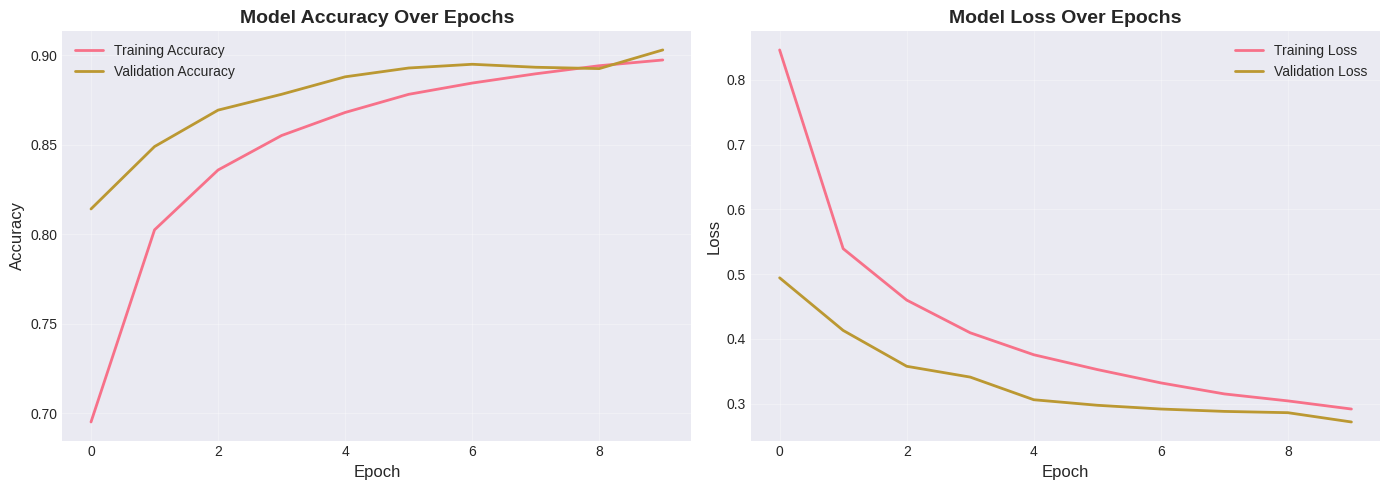

Final training accuracy: 0.8972
Final validation accuracy: 0.9028


In [7]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")

### 2. Confusion Matrix

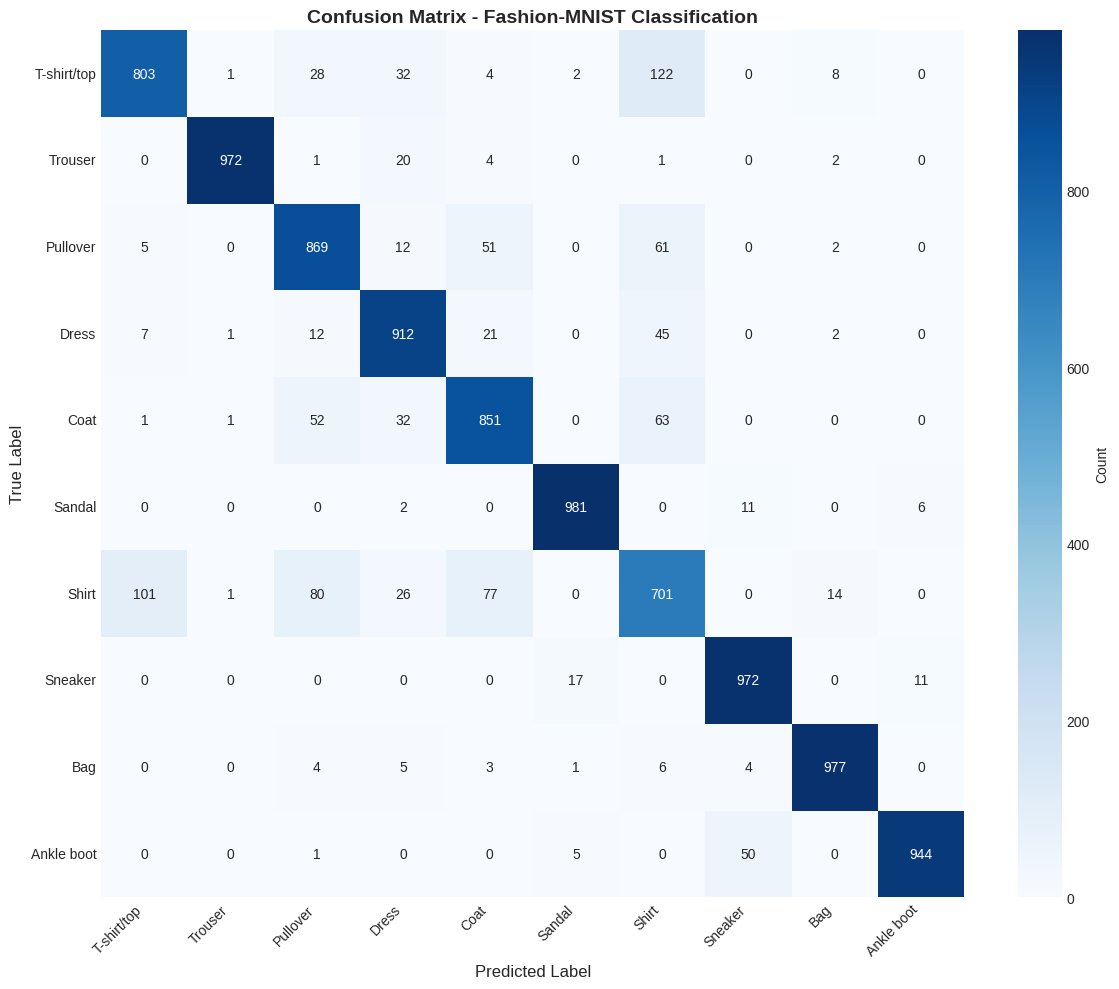


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.80      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.83      0.87      0.85      1000
       Dress       0.88      0.91      0.89      1000
        Coat       0.84      0.85      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.70      0.70      0.70      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [8]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Fashion-MNIST Classification', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

### 3. Sample Predictions

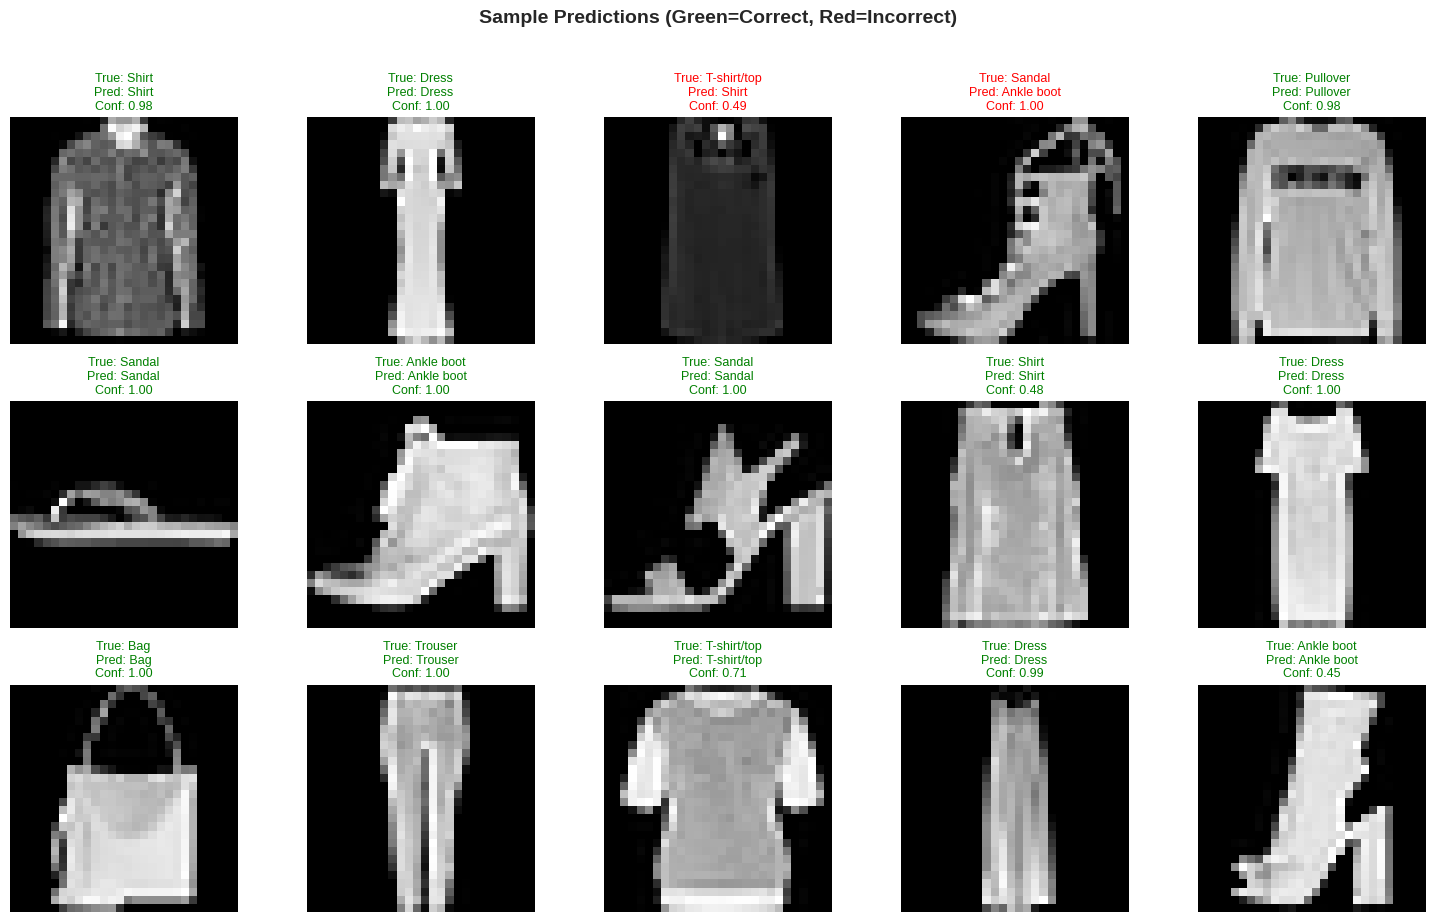

In [9]:
# Visualize sample predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.ravel()

# Select random samples
np.random.seed(42)
indices = np.random.choice(len(x_test), 15, replace=False)

for idx, ax in enumerate(axes):
    i = indices[idx]
    ax.imshow(x_test[i], cmap='gray')
    
    true_label = class_names[y_test[i]]
    pred_label = class_names[y_pred[i]]
    confidence = y_pred_probs[i][y_pred[i]]
    
    color = 'green' if y_test[i] == y_pred[i] else 'red'
    ax.set_title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}",
                fontsize=9, color=color)
    ax.axis('off')

plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 4. Visualizing CNN Filters

Let's visualize what the first convolutional layer has learned.

First conv layer weights shape: (3, 3, 1, 32)
(filter_height, filter_width, input_channels, num_filters)


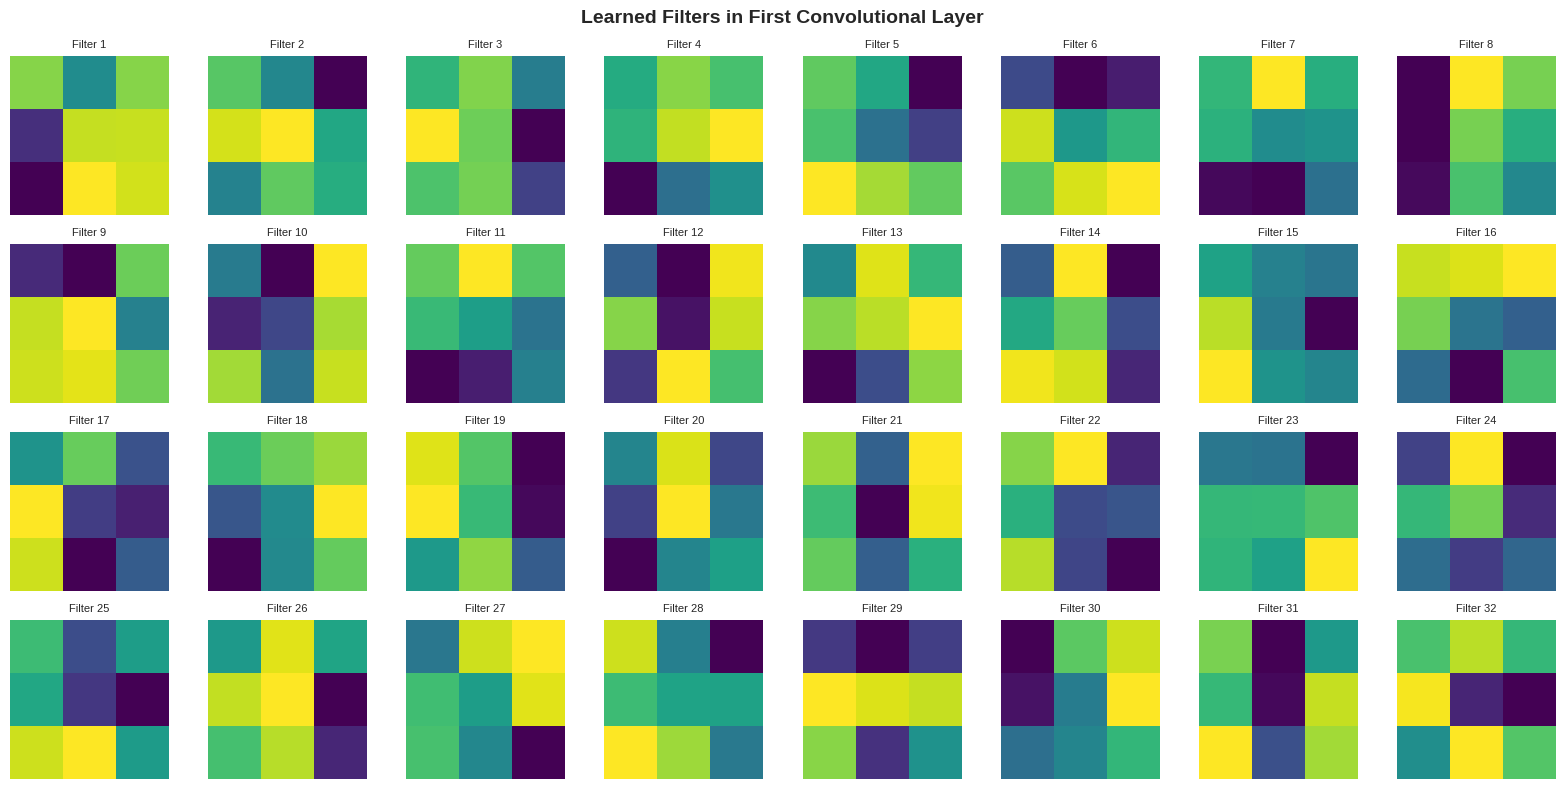

In [10]:
# Get the weights from the first convolutional layer
conv1_weights = model.get_layer('conv1').get_weights()[0]

print(f"First conv layer weights shape: {conv1_weights.shape}")
print(f"(filter_height, filter_width, input_channels, num_filters)")

# Normalize weights for visualization
conv1_weights_normalized = (conv1_weights - conv1_weights.min()) / (conv1_weights.max() - conv1_weights.min())

# Plot first 32 filters
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
axes = axes.ravel()

for i in range(32):
    axes[i].imshow(conv1_weights_normalized[:, :, 0, i], cmap='viridis')
    axes[i].set_title(f'Filter {i+1}', fontsize=8)
    axes[i].axis('off')

plt.suptitle('Learned Filters in First Convolutional Layer', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 5. Feature Map Visualization

Let's see what features are activated for a specific image.

In [11]:
# Build the model if needed (call it with dummy data)if not model.built:    model.build(input_shape=(None, 28, 28, 1))# Create a model to extract feature maps using functional API# We'll create a new model that outputs intermediate layersfrom tensorflow.keras import Input, Model# Create input layerinput_layer = Input(shape=(28, 28, 1))# Pass through the sequential model layers to get outputsx = input_layerlayer_outputs = []for layer in model.layers[:6]:  # First 6 layers    x = layer(x)    layer_outputs.append(x)# Create the activation modelactivation_model = Model(inputs=input_layer, outputs=layer_outputs)# Select a sample imagesample_idx = 0sample_image = x_test_cnn[sample_idx:sample_idx+1]# Get activationsactivations = activation_model.predict(sample_image, verbose=0)# Visualize feature maps from first conv layerfirst_layer_activation = activations[0]print(f"First layer activation shape: {first_layer_activation.shape}")# Plot original image and some feature mapsfig, axes = plt.subplots(3, 6, figsize=(16, 8))# Original imageaxes[0, 0].imshow(x_test[sample_idx], cmap='gray')axes[0, 0].set_title(f'Original\n{class_names[y_test[sample_idx]]}', fontweight='bold')axes[0, 0].axis('off')# Hide extra subplot in first rowfor i in range(1, 6):    axes[0, i].axis('off')# Plot 12 feature mapsfor i in range(12):    row = 1 + i // 6    col = i % 6    axes[row, col].imshow(first_layer_activation[0, :, :, i], cmap='viridis')    axes[row, col].set_title(f'Feature Map {i+1}', fontsize=9)    axes[row, col].axis('off')plt.suptitle('Feature Maps from First Convolutional Layer',              fontsize=14, fontweight='bold')plt.tight_layout()plt.show()

## Hands-On Activity

### Exercise 1: Experiment with Architecture

Modify the CNN architecture and observe the impact on performance:
- Try adding more convolutional layers
- Change the number of filters (16, 32, 64, 128)
- Experiment with different filter sizes (3x3, 5x5)
- Add batch normalization layers

### Exercise 2: Data Augmentation

Implement data augmentation to improve generalization:

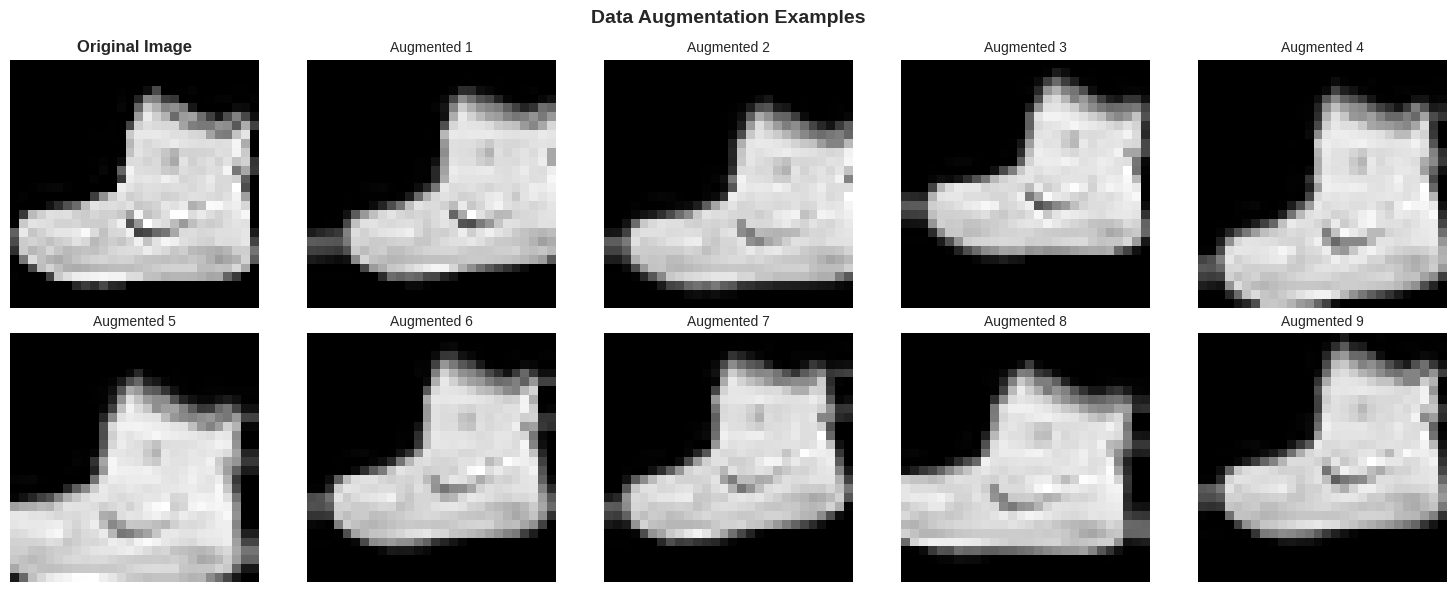


Tip: Train your model with augmented data using datagen.flow() for better generalization!


In [12]:
# Data augmentation example
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False  # Fashion items shouldn't be flipped
)

# Visualize augmented images
sample_image_aug = x_train_cnn[0:1]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

# Original image
axes[0].imshow(x_train[0], cmap='gray')
axes[0].set_title('Original Image', fontweight='bold')
axes[0].axis('off')

# Augmented images
for i, batch in enumerate(datagen.flow(sample_image_aug, batch_size=1)):
    if i >= 9:
        break
    axes[i+1].imshow(batch[0, :, :, 0], cmap='gray')
    axes[i+1].set_title(f'Augmented {i+1}', fontsize=10)
    axes[i+1].axis('off')

plt.suptitle('Data Augmentation Examples', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTip: Train your model with augmented data using datagen.flow() for better generalization!")

### Exercise 3: Transfer Learning (Advanced)

Try using a pre-trained model like VGG16 or ResNet50 for transfer learning:

In [13]:
# Example of transfer learning setup (for reference)
from tensorflow.keras.applications import VGG16

# Note: VGG16 requires RGB images (3 channels), so we'd need to convert our grayscale images
# This is just a demonstration of the concept

print("Transfer Learning Concept:")
print("1. Load a pre-trained model (e.g., VGG16 trained on ImageNet)")
print("2. Freeze the convolutional base to preserve learned features")
print("3. Add custom classifier layers for your specific task")
print("4. Train only the new layers on your dataset")
print("\nBenefits:")
print("- Leverage features learned from millions of images")
print("- Require less training data")
print("- Achieve better performance, especially on small datasets")

Transfer Learning Concept:
1. Load a pre-trained model (e.g., VGG16 trained on ImageNet)
2. Freeze the convolutional base to preserve learned features
3. Add custom classifier layers for your specific task
4. Train only the new layers on your dataset

Benefits:
- Leverage features learned from millions of images
- Require less training data
- Achieve better performance, especially on small datasets


### Exercise 4: Analyze Misclassifications

Let's examine where our model makes mistakes:

Total misclassified samples: 1018
Misclassification rate: 10.18%


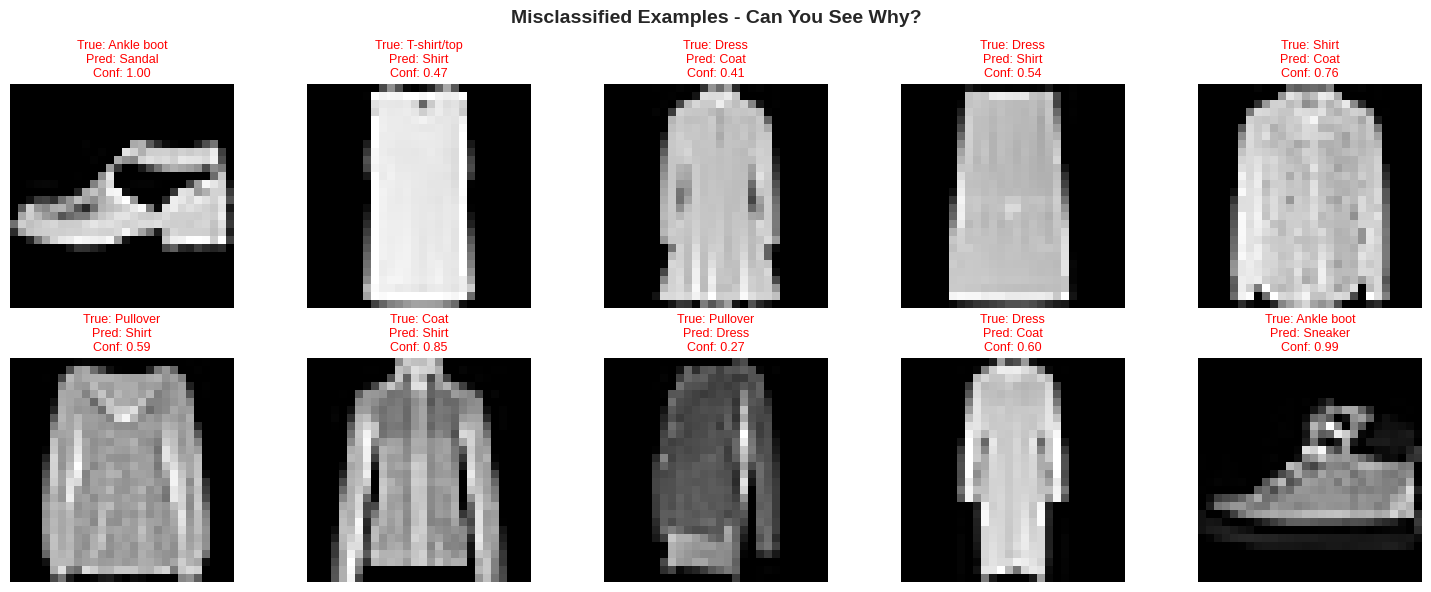


Most Common Confusion Pairs:
  T-shirt/top → Shirt: 122 times
  Shirt → T-shirt/top: 101 times
  Shirt → Pullover: 80 times
  Shirt → Coat: 77 times
  Coat → Shirt: 63 times


In [14]:
# Find misclassified examples
misclassified_indices = np.where(y_pred != y_test)[0]

print(f"Total misclassified samples: {len(misclassified_indices)}")
print(f"Misclassification rate: {len(misclassified_indices)/len(y_test)*100:.2f}%")

# Visualize some misclassifications
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for idx, ax in enumerate(axes):
    if idx >= len(misclassified_indices):
        break
    
    i = misclassified_indices[idx]
    ax.imshow(x_test[i], cmap='gray')
    
    true_label = class_names[y_test[i]]
    pred_label = class_names[y_pred[i]]
    confidence = y_pred_probs[i][y_pred[i]]
    
    ax.set_title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}",
                fontsize=9, color='red')
    ax.axis('off')

plt.suptitle('Misclassified Examples - Can You See Why?', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Most confused pairs
from collections import Counter

confusion_pairs = [(class_names[y_test[i]], class_names[y_pred[i]]) 
                   for i in misclassified_indices]
most_common = Counter(confusion_pairs).most_common(5)

print("\nMost Common Confusion Pairs:")
for (true_class, pred_class), count in most_common:
    print(f"  {true_class} → {pred_class}: {count} times")

## Key Takeaways

### Core Concepts

1. **CNNs are specialized for spatial data**: They preserve spatial relationships and use shared weights to efficiently process images

2. **Hierarchical feature learning**: CNNs automatically learn features at multiple levels:
   - Low-level: Edges, corners, textures
   - Mid-level: Parts, patterns, shapes
   - High-level: Objects, concepts

3. **Key components**:
   - **Convolutional layers**: Extract features using learnable filters
   - **Pooling layers**: Reduce dimensions and provide translation invariance
   - **Activation functions**: Introduce non-linearity (ReLU is standard)
   - **Fully connected layers**: Final classification

4. **Parameter efficiency**: Due to weight sharing, CNNs have far fewer parameters than fully connected networks for image tasks

### Best Practices

1. **Data preprocessing**:
   - Normalize pixel values (typically to [0, 1] or [-1, 1])
   - Use data augmentation to prevent overfitting
   - Ensure consistent input dimensions

2. **Architecture design**:
   - Start simple, then increase complexity
   - Use smaller filters (3x3) in deeper networks
   - Apply batch normalization for faster training
   - Add dropout to prevent overfitting

3. **Training strategies**:
   - Use Adam optimizer as a good default
   - Monitor validation accuracy to detect overfitting
   - Apply learning rate scheduling
   - Consider transfer learning for small datasets

4. **Evaluation**:
   - Don't rely solely on accuracy
   - Analyze confusion matrix for class-specific performance
   - Visualize misclassifications to identify patterns
   - Check for class imbalance issues

### Common Pitfalls

1. **Overfitting**: Model memorizes training data but fails on new data
   - Solution: Use dropout, data augmentation, regularization

2. **Vanishing gradients**: Deep networks struggle to train
   - Solution: Use ReLU activations, batch normalization, skip connections

3. **Poor generalization**: Model doesn't work on real-world data
   - Solution: Diverse training data, augmentation, cross-validation

4. **Class imbalance**: Some classes dominate training
   - Solution: Class weights, oversampling, focal loss

## Further Resources

### Essential Papers

1. **LeNet-5** (LeCun et al., 1998)
   - The pioneering CNN architecture
   - [Gradient-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

2. **AlexNet** (Krizhevsky et al., 2012)
   - Sparked the deep learning revolution
   - [ImageNet Classification with Deep Convolutional Neural Networks](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)

3. **VGGNet** (Simonyan & Zisserman, 2014)
   - Demonstrated the power of depth
   - [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)

4. **ResNet** (He et al., 2015)
   - Introduced residual connections for very deep networks
   - [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)

5. **CS231n: Convolutional Neural Networks for Visual Recognition**
   - Stanford's excellent course materials
   - [http://cs231n.stanford.edu/](http://cs231n.stanford.edu/)

### Books

1. **Deep Learning** by Goodfellow, Bengio, and Courville
   - Chapter 9: Convolutional Networks
   - Free online: [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)

2. **Deep Learning with Python** by François Chollet
   - Practical guide by the creator of Keras

### Interactive Resources

1. **CNN Explainer**
   - Interactive visualization of CNN operations
   - [https://poloclub.github.io/cnn-explainer/](https://poloclub.github.io/cnn-explainer/)

2. **TensorFlow Playground**
   - Visualize neural network training
   - [https://playground.tensorflow.org/](https://playground.tensorflow.org/)

3. **Distill.pub**
   - Beautiful interactive explanations
   - [https://distill.pub/](https://distill.pub/)

### Datasets for Practice

1. **MNIST**: Handwritten digits (beginner-friendly)
2. **Fashion-MNIST**: Clothing items (used in this lesson)
3. **CIFAR-10/CIFAR-100**: Small color images (intermediate)
4. **ImageNet**: Large-scale image database (advanced)
5. **Kaggle Competitions**: Real-world challenges with leaderboards

### Advanced Topics to Explore

1. **Object Detection**: YOLO, Faster R-CNN, RetinaNet
2. **Semantic Segmentation**: U-Net, DeepLab, Mask R-CNN
3. **Generative Models**: GANs, VAEs for image generation
4. **Neural Architecture Search**: AutoML for CNN design
5. **Explainability**: Grad-CAM, saliency maps, attention mechanisms

---

**Congratulations!** You've completed Lesson 54 on Convolutional Neural Networks. You now understand how CNNs work, how to implement them, and how they've revolutionized computer vision. Keep experimenting with different architectures and datasets to deepen your understanding!